https://qiita.com/maskot1977/items/082557fcda78c4cdb41f

In [34]:
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.decomposition import PCA

In [35]:
url = "https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/wine.txt"
urllib.request.urlretrieve(url, 'wine.txt')

('wine.txt', <http.client.HTTPMessage at 0x7f811c27e460>)

In [36]:
df = pd.read_csv('wine.txt', sep='\t', index_col=0)

In [37]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [38]:
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [39]:
pca = PCA()
pca.fit(dfs)
feature = pca.transform(dfs)

In [40]:
pd.DataFrame(feature, columns=["PC{}".format(x+1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.307421,-1.439402,-0.165273,-0.215025,0.691093,-0.223250,0.594749,0.064956,0.639638,1.018084,-0.450293,0.539289,-0.066052
1,2.203250,0.332455,-2.020757,-0.290539,-0.256930,-0.924512,0.053624,1.021534,-0.307978,0.159252,-0.142256,0.387146,0.003626
2,2.509661,-1.028251,0.980054,0.722863,-0.250327,0.547731,0.423012,-0.343248,-1.174521,0.113042,-0.285866,0.000582,0.021655
3,3.746497,-2.748618,-0.175696,0.566386,-0.310964,0.114109,-0.382259,0.641783,0.052397,0.238739,0.757448,-0.241339,-0.368444
4,1.006070,-0.867384,2.020987,-0.408613,0.297618,-0.405376,0.442825,0.415528,0.325900,-0.078146,-0.524466,-0.216055,-0.079140


In [41]:
feature = feature[:, :2]

In [42]:
feature[label==1]

array([[ 3.30742097, -1.43940225],
       [ 2.20324981,  0.33245507],
       [ 2.50966069, -1.02825072],
       [ 3.74649719, -2.74861839],
       [ 1.00607049, -0.86738404],
       [ 3.04167373, -2.11643092],
       [ 2.44220051, -1.17154534],
       [ 2.05364379, -1.60443714],
       [ 2.50381135, -0.91548847],
       [ 2.74588238, -0.78721703],
       [ 3.46994837, -1.29866985],
       [ 1.74981688, -0.61025577],
       [ 2.10751729, -0.67380561],
       [ 3.44842921, -1.12744948],
       [ 4.30065228, -2.09007971],
       [ 2.29870383, -1.65787506],
       [ 2.16584568, -2.32075875],
       [ 1.89362947, -1.62677993],
       [ 3.53202167, -2.51125971],
       [ 2.07865856, -1.05815307],
       [ 3.11561376, -0.78468361],
       [ 1.08351361, -0.24106354],
       [ 2.52809263,  0.09158228],
       [ 1.64036108,  0.51482667],
       [ 1.75662066,  0.31625681],
       [ 0.98729406, -0.93802129],
       [ 1.77028387, -0.68424496],
       [ 1.23194878,  0.08955442],
       [ 2.18225047,

In [43]:
label = np.array(list(df.iloc[:, 0]))

In [44]:
feature[label==1, 0]

array([3.30742097, 2.20324981, 2.50966069, 3.74649719, 1.00607049,
       3.04167373, 2.44220051, 2.05364379, 2.50381135, 2.74588238,
       3.46994837, 1.74981688, 2.10751729, 3.44842921, 4.30065228,
       2.29870383, 2.16584568, 1.89362947, 3.53202167, 2.07865856,
       3.11561376, 1.08351361, 2.52809263, 1.64036108, 1.75662066,
       0.98729406, 1.77028387, 1.23194878, 2.18225047, 2.24976267,
       2.49318704, 2.66987964, 1.62399801, 1.8973387 , 1.40642118,
       1.89847087, 1.38096669, 1.1190507 , 1.49796891, 2.5226849 ,
       2.58081526, 0.66660159, 3.06216898, 0.46090897, 2.09544094,
       1.1329702 , 2.71893118, 2.813403  , 2.00419725, 2.69987528,
       3.20587409, 2.85091773, 3.49574328, 2.21853316, 2.14094846,
       2.4623834 , 2.73380617, 2.16762631, 3.13054925])

In [45]:
x1, y1 = feature[label==1, 0], feature[label==1, 1]
x2, y2 = feature[label==2, 0], feature[label==2, 1]
x3, y3 = feature[label==3, 0], feature[label==3, 1]

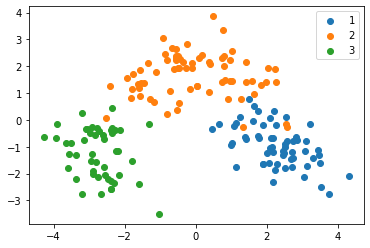

In [46]:
plt.scatter(x1, y1, label="1")
plt.scatter(x2, y2, label="2")
plt.scatter(x3, y3, label="3")
plt.legend()
plt.show()